In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# import SVM
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
# import encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


In [2]:
df=pd.read_csv('../input/airlines-customer-satisfaction/Invistico_Airline.csv')


In [3]:
df=df.sample(n=100000,random_state=1)



In [4]:
df.head()
# print all the unique values in the dataframe
for i in range(len(df.columns)):
    print(df.columns[i],df.iloc[:,i].unique())




satisfaction ['dissatisfied' 'satisfied']
Gender ['Male' 'Female']
Customer Type ['Loyal Customer' 'disloyal Customer']
Age [49 37 43 47 56 33 57 67 41 45 29 26 51 16 21 32 14 61 59 34 50 20 68 44
 42 36 31 48 55 39 53 15 62 25 70 60 19 18 52 27 23 54 24 66 30  7 28 69
 22 64 10 40 38 13 35  9 58 12 46 11 65 17 79 85 63  8 71 75 77 72 80 76
 78 74 73]
Type of Travel ['Personal Travel' 'Business travel']
Class ['Eco' 'Business' 'Eco Plus']
Flight Distance [2501 1624 1755 ... 4422 5386 5302]
Seat comfort [3 4 0 1 2 5]
Departure/Arrival time convenient [4 0 3 5 2 1]
Food and drink [2 4 0 1 3 5]
Gate location [3 2 1 4 5 0]
Inflight wifi service [5 2 1 3 4 0]
Inflight entertainment [2 4 1 5 3 0]
Online support [5 2 3 4 1 0]
Ease of Online booking [5 2 1 3 4 0]
On-board service [4 1 5 2 3 0]
Leg room service [4 1 3 5 2 0]
Baggage handling [4 1 3 5 2]
Checkin service [3 5 1 2 4 0]
Cleanliness [4 1 5 3 2 0]
Online boarding [5 2 1 3 4 0]
Departure Delay in Minutes [   0   12   15   16  192   89

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 24303 to 25405
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       100000 non-null  object 
 1   Gender                             100000 non-null  object 
 2   Customer Type                      100000 non-null  object 
 3   Age                                100000 non-null  int64  
 4   Type of Travel                     100000 non-null  object 
 5   Class                              100000 non-null  object 
 6   Flight Distance                    100000 non-null  int64  
 7   Seat comfort                       100000 non-null  int64  
 8   Departure/Arrival time convenient  100000 non-null  int64  
 9   Food and drink                     100000 non-null  int64  
 10  Gate location                      100000 non-null  int64  
 11  Inflight wifi service              100000

In [6]:
df.shape

(100000, 23)

In [7]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             299
dtype: int64

EDA


In [8]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

/tmp/ipykernel_32/2789075310.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Arrival Delay in Minutes']);


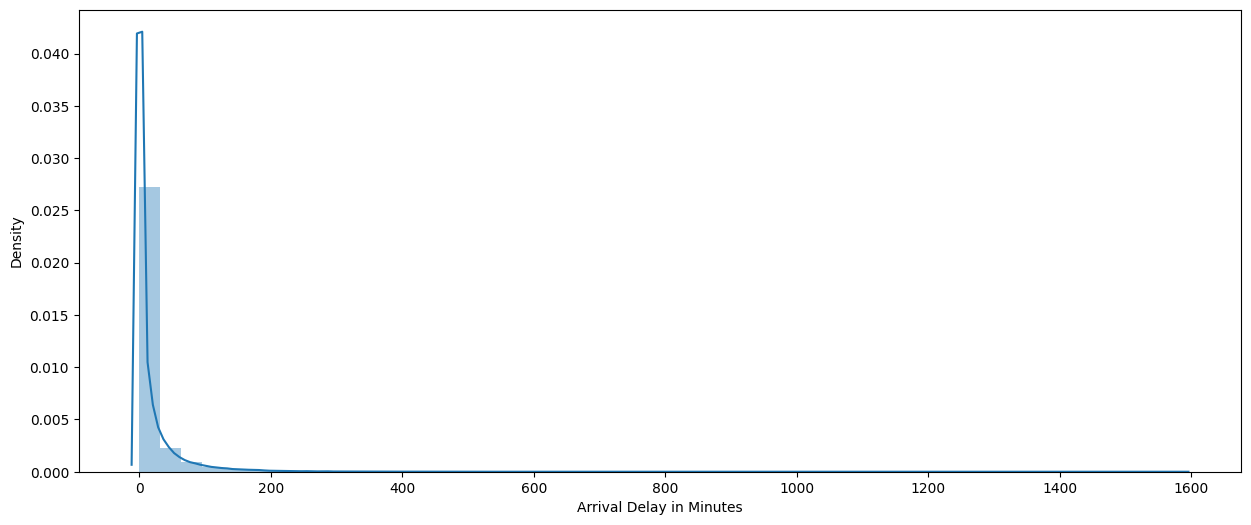

In [9]:
fig = plt.figure(figsize=(15,6))
sns.distplot(df['Arrival Delay in Minutes']); 
plt.show()

/tmp/ipykernel_32/4232641947.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Departure Delay in Minutes']);


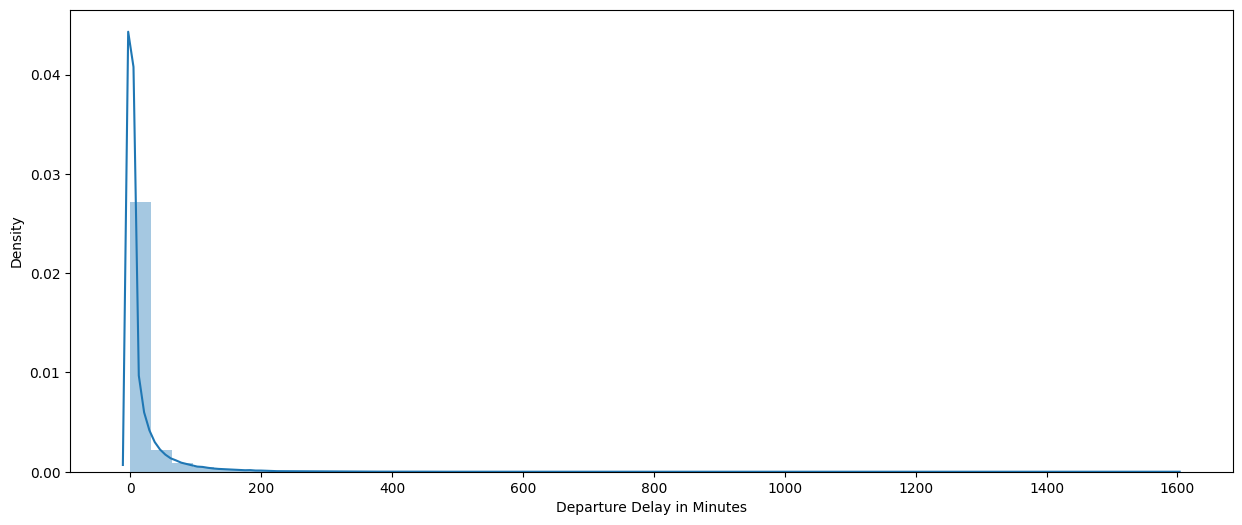

In [10]:
fig = plt.figure(figsize=(15,6))
sns.distplot(df['Departure Delay in Minutes']); 
plt.show()

In [11]:
#heatmap
# increase size
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(df.corr(),annot=True)


ValueError: could not convert string to float: 'dissatisfied'

The heat map shows us the correlation between our variables. Only some variables have higher correlation and most of our variables less correlation. We also have some variables which has negative correlation.

<Axes: xlabel='Customer Type', ylabel='Age'>

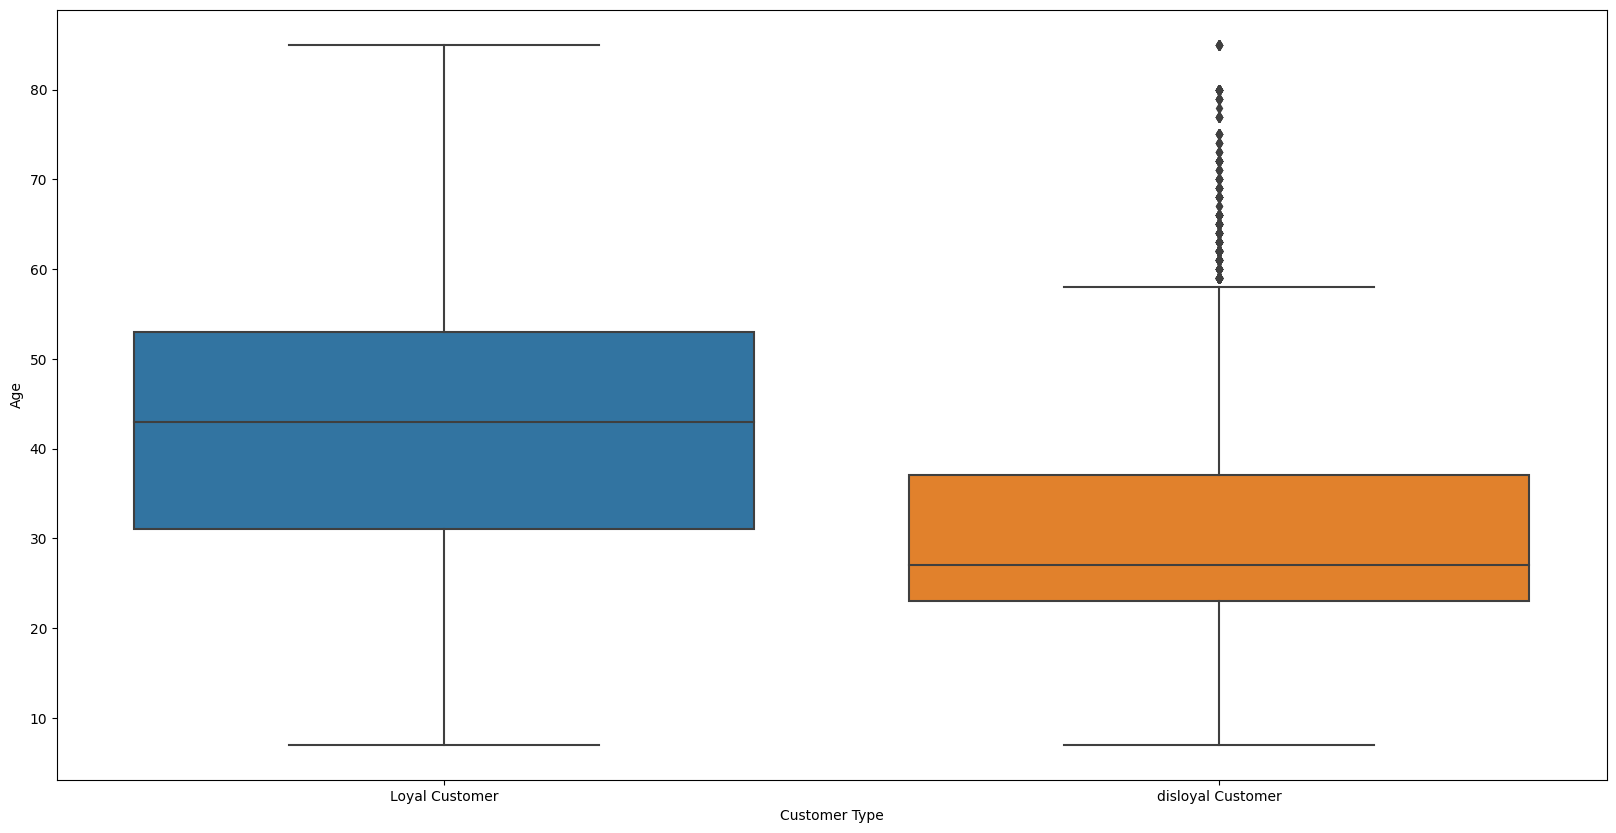

In [12]:
sns.boxplot(data = df, x='Customer Type', y='Age')

The boxplot tells us that we have significantly higher number of Loyal customers. The airline has more regular customers, which hints us that the customers like the airline service and are satisfied.

<Axes: xlabel='Class', ylabel='count'>

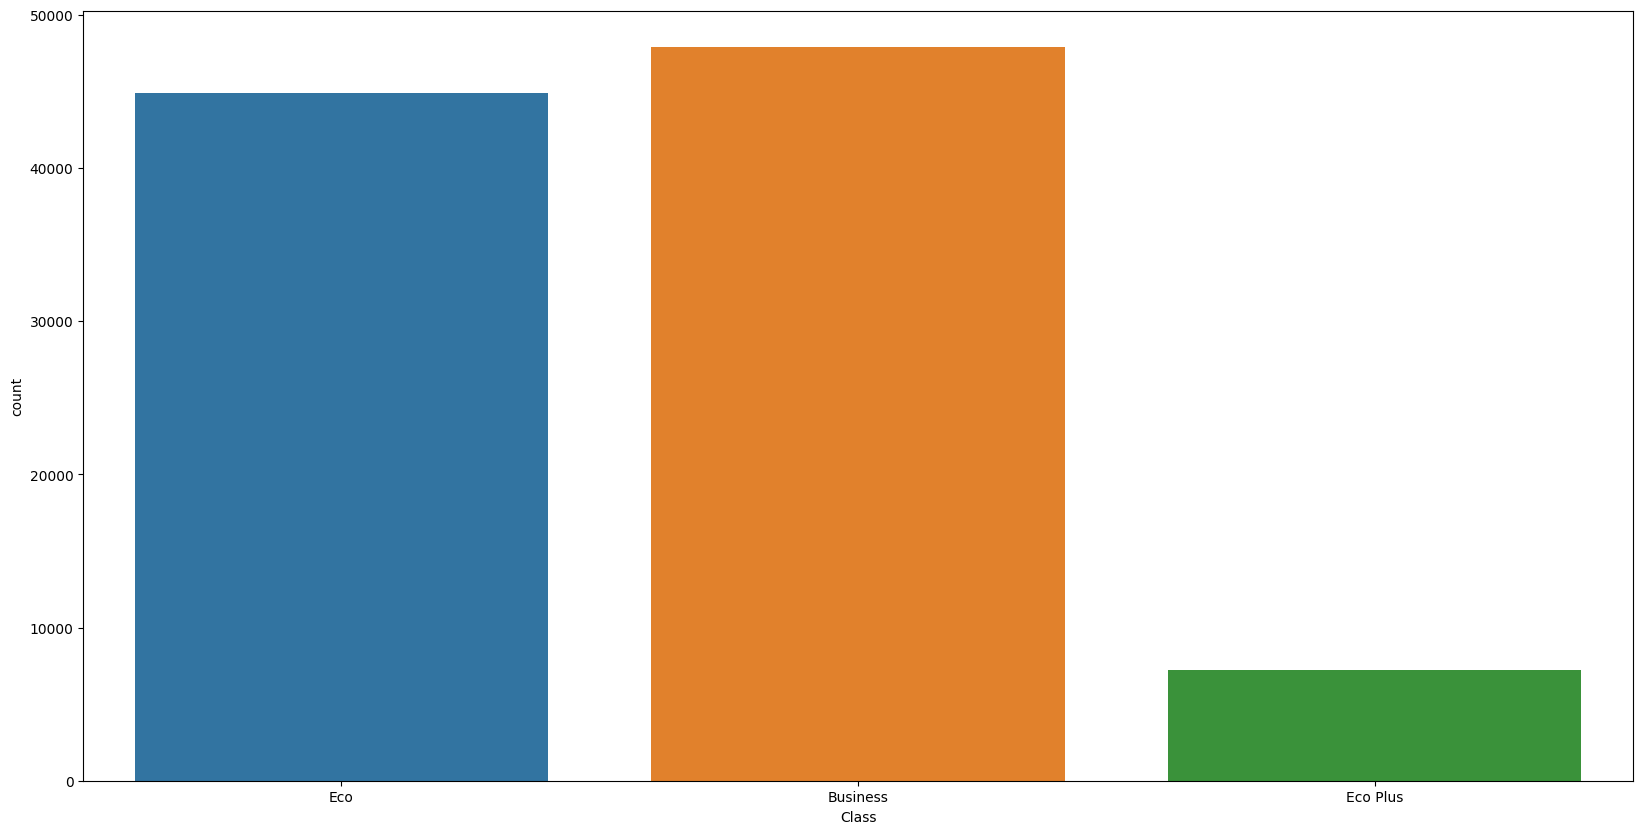

In [13]:
sns.countplot(data = df, x = 'Class')


Here we have three classes, most of the customers belong to the business and eco class. We have roughly higher number of business class people. 

<Axes: title={'center': 'Gender'}, ylabel='count'>

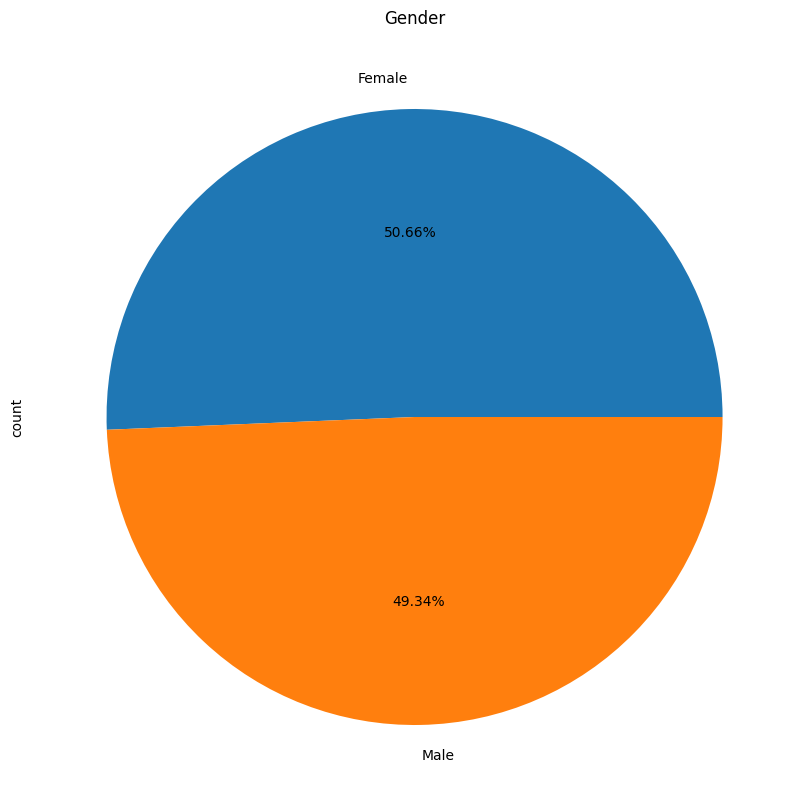

In [14]:

plt.figure(figsize=(10,10))
plt.title("Gender")
df["Gender"].value_counts().plot(kind="pie",autopct='%1.2f%%')

Our data is not gender biased, and we have approximately equal proportion.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 24303 to 25405
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       100000 non-null  object 
 1   Gender                             100000 non-null  object 
 2   Customer Type                      100000 non-null  object 
 3   Age                                100000 non-null  int64  
 4   Type of Travel                     100000 non-null  object 
 5   Class                              100000 non-null  object 
 6   Flight Distance                    100000 non-null  int64  
 7   Seat comfort                       100000 non-null  int64  
 8   Departure/Arrival time convenient  100000 non-null  int64  
 9   Food and drink                     100000 non-null  int64  
 10  Gate location                      100000 non-null  int64  
 11  Inflight wifi service              100000

This dataset is from Kaggle and it talks about the Customer's Airline satisfaction. We have satisfaction as our dependent variable and the other variables as independent variables.

In [16]:
# label encoding

col=df.columns
# for i in col:
#     if df[i].dtype=='object':
#         lbl=LabelEncoder()
#         fitting_encoding=lbl.fit(df[i])
#         df[i]=lbl.transform(df[i])
lbl=LabelEncoder()
df['satisfaction']=lbl.fit_transform(df['satisfaction'])
gen=lbl.fit(df['Gender'])
df['Gender']=gen.transform(df['Gender'])
cus=lbl.fit(df['Customer Type'])
df['Customer Type']=cus.transform(df['Customer Type'])
ty=lbl.fit(df['Type of Travel'])
df['Type of Travel']=ty.transform(df['Type of Travel'])
cla=lbl.fit(df['Class'])
df['Class']=cla.transform(df['Class'])


df_normal= df.sample(7000,random_state=10)
df_normal

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
120217,1,0,0,15,0,2,2303,5,4,4,...,5,5,5,3,3,2,4,5,1,7.0
54110,0,1,1,27,0,0,2229,3,3,3,...,2,2,4,1,3,3,3,2,0,0.0
14042,1,0,0,69,1,2,690,5,5,5,...,4,4,5,5,4,4,4,4,11,0.0
109758,1,0,0,38,0,0,1914,5,5,5,...,5,5,5,4,5,4,5,4,0,0.0
117121,1,0,0,45,0,0,2465,5,5,5,...,5,4,2,3,4,5,4,5,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99855,1,1,0,47,0,0,2891,1,1,1,...,5,4,4,4,4,4,4,4,0,0.0
66212,0,0,0,51,0,0,1124,1,3,3,...,3,1,1,1,1,4,1,4,2,6.0
87590,1,1,0,48,0,0,509,5,5,5,...,4,3,3,4,3,2,3,5,28,30.0
124487,1,0,0,36,0,0,207,2,2,2,...,4,5,5,5,5,5,5,4,54,36.0


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


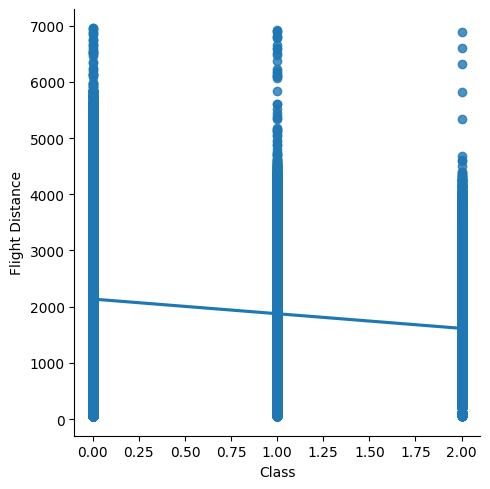

In [17]:
sns.lmplot(x="Class", y="Flight Distance", data=df)
plt.show()

As part of our preprocessing, we are going to use Min_max_scaler to scale the data.


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
df = scaling.fit_transform(df)
df = pd.DataFrame(df, columns=col)





In [21]:
df_normal.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
120217,1,0,0,15,0,2,2303,5,4,4,...,5,5,5,3,3,2,4,5,1,7.0
54110,0,1,1,27,0,0,2229,3,3,3,...,2,2,4,1,3,3,3,2,0,0.0
14042,1,0,0,69,1,2,690,5,5,5,...,4,4,5,5,4,4,4,4,11,0.0
109758,1,0,0,38,0,0,1914,5,5,5,...,5,5,5,4,5,4,5,4,0,0.0
117121,1,0,0,45,0,0,2465,5,5,5,...,5,4,2,3,4,5,4,5,1,9.0


Splitting dataset into features and target


In [22]:
features=df.drop(['satisfaction'] , axis=1)
target = df.satisfaction

In [23]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)


we will use the SVM and then we will find its accuracy


In [24]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Accuracy of SVM classifier on test set:')
print(clf.score(X_test, y_test))
classs=classification_report(y_test,y_pred)
print(classs)

Accuracy of SVM classifier on test set:
0.8365818595165658
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82     13583
         1.0       0.85      0.84      0.85     16328

    accuracy                           0.84     29911
   macro avg       0.84      0.84      0.84     29911
weighted avg       0.84      0.84      0.84     29911





We got accuracy of 0.8 with the SVM model.

Now we will try with 
## PCA.



Training a new model With PCA and setting the n_components as 14, i have set it as 14 because when i ran earlier as 0.9, it gave 14 components






In [26]:


# We will try applying PCA for dimensionality reduction

pca = PCA(n_components=14)
a=pca.fit(features)
pca_array=pca.transform(features)
pca_df=pd.DataFrame(pca_array)
pca_df.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.237176,0.800685,-0.448581,0.392148,0.042320,0.406420,0.349186,0.030702,-0.056996,0.126241,0.082650,-0.069283,-0.007156,-0.088042
1,0.442363,-0.385299,-0.458239,-0.567017,-0.672223,0.083904,-0.425646,-0.365894,0.002899,0.154559,0.114407,-0.156841,-0.052292,-0.085314
2,1.099432,-0.454146,0.900784,0.344077,0.673504,-0.643370,-0.148664,-0.517534,0.179566,0.004095,-0.047582,0.198007,0.210393,-0.059906
3,0.577877,0.824093,-0.056740,0.601977,0.050560,-0.038404,0.034137,-0.327885,0.224060,0.113576,0.202557,-0.316927,0.216293,-0.143048
4,-0.202424,-0.184394,-0.788343,0.280148,-0.135011,-0.319855,0.186779,0.391363,-0.256295,-0.007215,0.136917,-0.283884,-0.314262,0.216584


In [27]:


pca_df['y']=df.satisfaction
pca_df.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,y
0,-0.237176,0.800685,-0.448581,0.392148,0.042320,0.406420,0.349186,0.030702,-0.056996,0.126241,0.082650,-0.069283,-0.007156,-0.088042,0.0
1,0.442363,-0.385299,-0.458239,-0.567017,-0.672223,0.083904,-0.425646,-0.365894,0.002899,0.154559,0.114407,-0.156841,-0.052292,-0.085314,1.0
2,1.099432,-0.454146,0.900784,0.344077,0.673504,-0.643370,-0.148664,-0.517534,0.179566,0.004095,-0.047582,0.198007,0.210393,-0.059906,1.0
3,0.577877,0.824093,-0.056740,0.601977,0.050560,-0.038404,0.034137,-0.327885,0.224060,0.113576,0.202557,-0.316927,0.216293,-0.143048,0.0
4,-0.202424,-0.184394,-0.788343,0.280148,-0.135011,-0.319855,0.186779,0.391363,-0.256295,-0.007215,0.136917,-0.283884,-0.314262,0.216584,1.0


<Axes: xlabel='0', ylabel='1'>

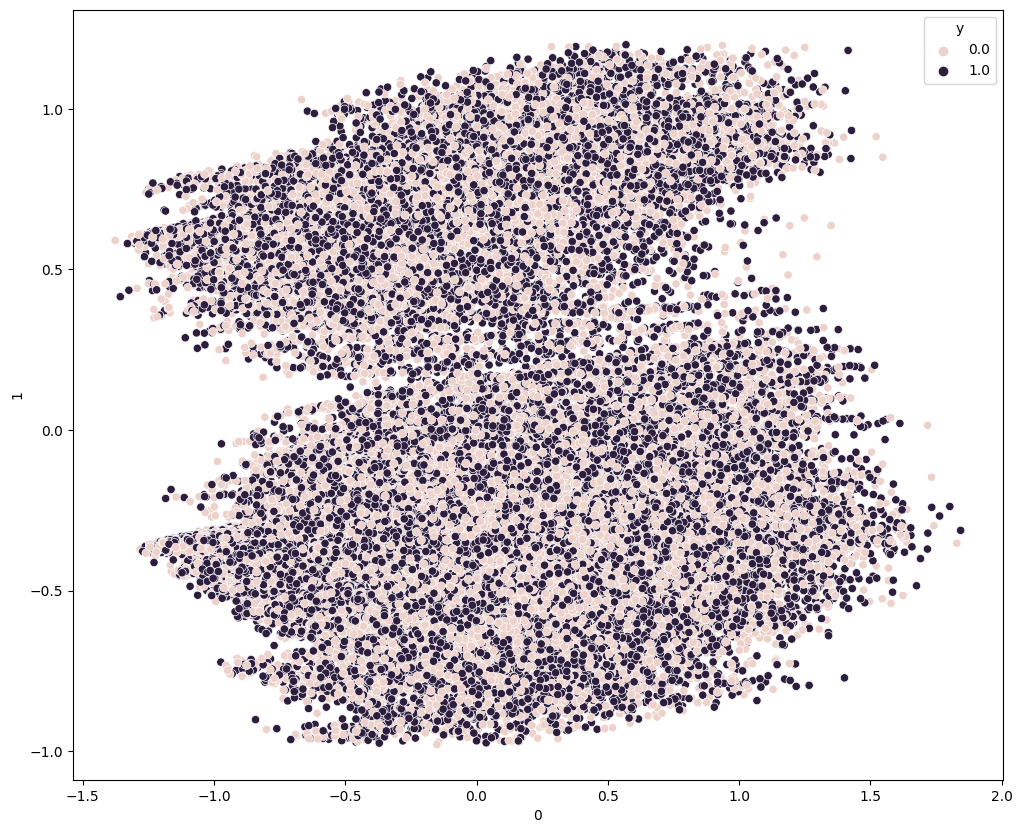

In [28]:


# scatter plot of the data
plt.rcParams['figure.figsize'] = (12, 10)
sns.scatterplot(x=0, y=1, hue='y', data=pca_df)



In [30]:


# train_test split of pca_df
features_pca=pca_df.drop(['y'] , axis=1)
target_pca = pca_df.y
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_pca, target_pca, test_size=0.3, random_state=10)



In [31]:
from sklearn import svm
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train_pca, y_train_pca)
y_pred_pca=clf2.predict(X_test_pca)
print('Accuracy of SVM classifier on test set:')
print(clf2.score(X_test_pca, y_test_pca))
classs=classification_report(y_test_pca,y_pred_pca)
print(classs)

Accuracy of SVM classifier on test set:
0.5480701519063746
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     13477
         1.0       0.55      1.00      0.71     16344

    accuracy                           0.55     29821
   macro avg       0.27      0.50      0.35     29821
weighted avg       0.30      0.55      0.39     29821



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




When we run SVM with PCA with n_components as 14, we got accuracy of 0.53 which is very less.

Setting the component to be set as 10.


In [32]:


pca = PCA(n_components=10)
pca.fit(features)
pca_array=pca.transform(features)
pca_df2=pd.DataFrame(pca_array)
pca_df2



,0,1,2,3,4,5,6,7,8,9
0,-0.237176,0.800685,-0.448581,0.392148,0.042320,0.406420,0.349186,0.030702,-0.056996,0.126241
1,0.442363,-0.385299,-0.458239,-0.567017,-0.672223,0.083904,-0.425646,-0.365894,0.002899,0.154559
2,1.099432,-0.454146,0.900784,0.344077,0.673504,-0.643370,-0.148664,-0.517534,0.179566,0.004095
3,0.577877,0.824093,-0.056740,0.601977,0.050560,-0.038404,0.034137,-0.327885,0.224060,0.113576
4,-0.202424,-0.184394,-0.788343,0.280148,-0.135011,-0.319855,0.186779,0.391363,-0.256295,-0.007215
...,...,...,...,...,...,...,...,...,...,...
99696,0.026365,0.594059,0.754179,0.021538,-0.311340,-0.299414,-0.044141,-0.020037,-0.171994,-0.016815
99697,0.976581,-0.611508,-0.298633,0.790229,-0.649555,0.257957,0.186296,-0.486257,-0.049822,-0.141238
99698,-0.685992,-0.155327,-0.989735,-0.045351,-0.105988,-0.016722,0.112321,-0.083891,0.181813,0.085665
99699,-0.875601,-0.471478,-0.017078,0.193174,-0.183414,-0.328364,-0.051955,-0.085767,0.186419,0.031413


<Axes: xlabel='0', ylabel='1'>

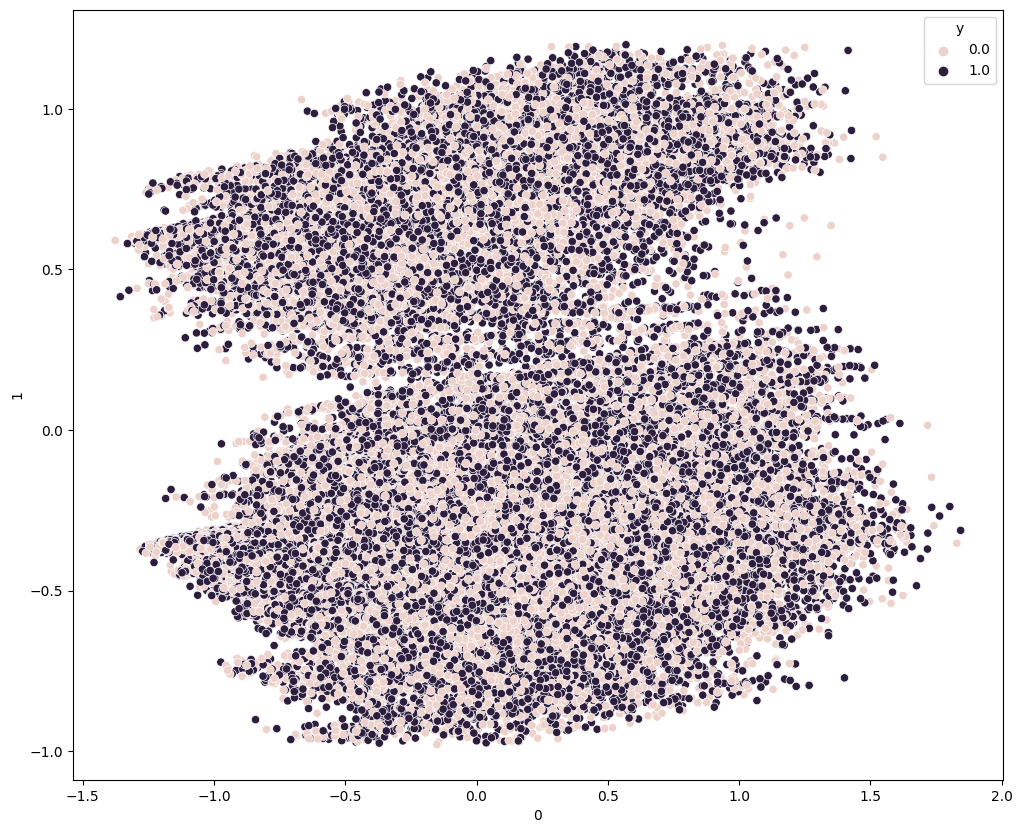

In [33]:
# scatter plot of the data
# scatter plot of the data
pca_df2_full=pd.concat([pca_df2,target_pca],axis=1)


plt.rcParams['figure.figsize'] = (12, 10)
sns.scatterplot(x=0, y=1, hue='y', data=pca_df2_full)
# pca_df2_full

In [34]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(pca_df2, target, test_size=0.3, random_state=10)
# running svm
clf3 = svm.SVC(kernel='linear')
clf3.fit(x_train2, y_train2)
y_pred_pca2=clf3.predict(x_test2)
print('Accuracy of SVM classifier on test set:')
print(clf3.score(x_test2, y_test2))
classs=classification_report(y_test2,y_pred_pca2)
print(classs)

Accuracy of SVM classifier on test set:
0.8280900003343251
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81     13583
         1.0       0.85      0.84      0.84     16328

    accuracy                           0.83     29911
   macro avg       0.83      0.83      0.83     29911
weighted avg       0.83      0.83      0.83     29911





When we run with PCA with n_components as 10, we got accuracy of 0.82
